# Грунина Маргарита
# Задание 4. Нестационарные уравнения с одной пространственной переменной. Исследование устойчивости.

### $$\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x}=f(x, t)$$

### $$c = 2,\; f(x) = cos(xt)$$

### $$u(x, 0) = sin(x)=\varphi(x),\; u(0, t)=1-cos(t)=\psi(t)$$

### $$0\leq x\leq a,\; 0\leq t \leq T$$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [17]:
# Вводим начально-краевые условия
c = 2
phi = np.sin
psi = lambda x: 1 - np.cos(x)
f = lambda x, t: np.cos(x * t)

### Вводим равномерную сетку
### $$\{x_n=nh,\; 0\leq n < \leq N,\; h = a/N;\; t_k=k\tau,\; k =1, 2,..\}$$

## Явная схема: $$\frac{\hat{u}_n-u_n}{\tau}+c\frac{u_n-u_{n-1}}{h}=f_n$$

### $$\hat{u}_n=\tau f_n + (1-\frac{c\tau}{h})u_n + \frac{c\tau}{h} u_{n-1}=\tau f_n + (1-\kappa)u_n + \kappa u_{n-1}$$

## $$\kappa=\frac{c\tau}{h}$$

### Устойчива при $\kappa \leq 1$

In [31]:
def ExplicitScheme(c: float, f: callable,
                    xs: np.ndarray, ts: np.ndarray, mesh: np.ndarray,
                    tau: float, h: float
                    ):
    kappa = c * tau / h
    mesh = mesh.copy()
    n = xs.shape[0]
    k = ts.shape[0]
    for i in range(1, n):
        for j in range(k - 1):
             mesh[i, j + 1] =  tau * f(xs[i], ts[j]) + (1 - kappa) * mesh[i, j] + kappa * mesh[i - 1, j]
    return mesh

## Чисто неявная схема: $$\frac{\hat{u}_n-u_n}{\tau}+c\frac{\hat{u}_n-\hat{u}_{n-1}}{h}=\hat{f}_n$$

## $$\hat{u}_n = \frac{\tau}{1 + \kappa}\hat{f}_n+\frac{\kappa}{1+\kappa}\hat{u}_{n-1}+\frac{1}{1+\kappa}u_n$$

### Устойчива безусловно

In [25]:
def PureImplicitScheme(c: float, f: callable,
                         xs: np.ndarray, ts: np.ndarray, mesh: np.ndarray,
                         tau: float, h: float
                         ):
    kappa = c * tau / h
    mesh = mesh.copy()
    n = xs.shape[0]
    k = ts.shape[0]
    for i in range(1, n):
        for j in range(k - 1):
             mesh[i, j + 1] =  (tau * f(xs[i], ts[j + 1]) + kappa * mesh[i - 1, j + 1] + mesh[i, j]) / (1 + kappa)
    return mesh

## Неявная схема: $$\frac{\hat{u}_{n-1}-u_{n-1}}{\tau}+c\frac{\hat{u}_n-\hat{u}_{n-1}}{h}=\hat{f}_n$$

## $$\hat{u}_n = \frac{\tau}{\kappa}\hat{f}_n+\frac1{\kappa}u_{n-1}+(1-\frac1{\kappa})\hat{u}_{n-1}$$

### Устойчива при $\kappa \geq 1$

In [26]:
def ImplicitScheme(c: float, f: callable,
                            xs: np.ndarray, ts: np.ndarray, mesh: np.ndarray,
                            tau: float, h: float
                            ):
    kappa = c * tau / h
    mesh = mesh.copy()
    n = xs.shape[0]
    k = ts.shape[0]
    for i in range(1, n):
        for j in range(k - 1):
             mesh[i, j + 1] =  tau / kappa * f(xs[i], ts[j + 1]) + 1 / kappa * mesh[i - 1, j] + (1 - 1 / kappa) * mesh[i - 1, j + 1]
    return mesh

### Симметричная схема: $$\frac{\hat{u}_n+\hat{u}_{n-1}-u_n-u_{n-1}}{\tau}+c\frac{\hat{u}_n+u_n-\hat{u}_{n-1}-u_{n-1}}{h}=2f(x_n + \frac{h}2,\; t_k+\frac{\tau}2)$$

## $$\hat{u}_n = \frac{2\tau}{1+\kappa}{f(x_n + \frac{h}2,\; t_k+\frac{\tau}2)}-\frac{1-\kappa}{1+\kappa}\hat{u}_{n-1}+ \frac{1-\kappa}{1+\kappa}u_n+ u_{n-1}$$

### Устойчива безусловно

In [29]:
def SymmetricScheme(c: float, f: callable,
                     xs: np.ndarray, ts: np.ndarray, mesh: np.ndarray,
                     tau: float, h: float
                    ):
    kappa = c * tau / h
    mesh = mesh.copy()
    n = xs.shape[0]
    k = ts.shape[0]
    for i in range(1, n):
        for j in range(k - 1):
             mesh[i, j + 1] =  2 * tau / (1+kappa) * f(xs[i] + h / 2, ts[j] + tau / 2) - (1 - kappa) / (1+kappa) * mesh[i - 1, j + 1] + (1 - kappa) / (1+kappa) * mesh[i, j] + mesh[i - 1, j]
    return mesh

## Проверим, правильны ли наши рассчёты устойчивых и неустойчивых $\kappa$

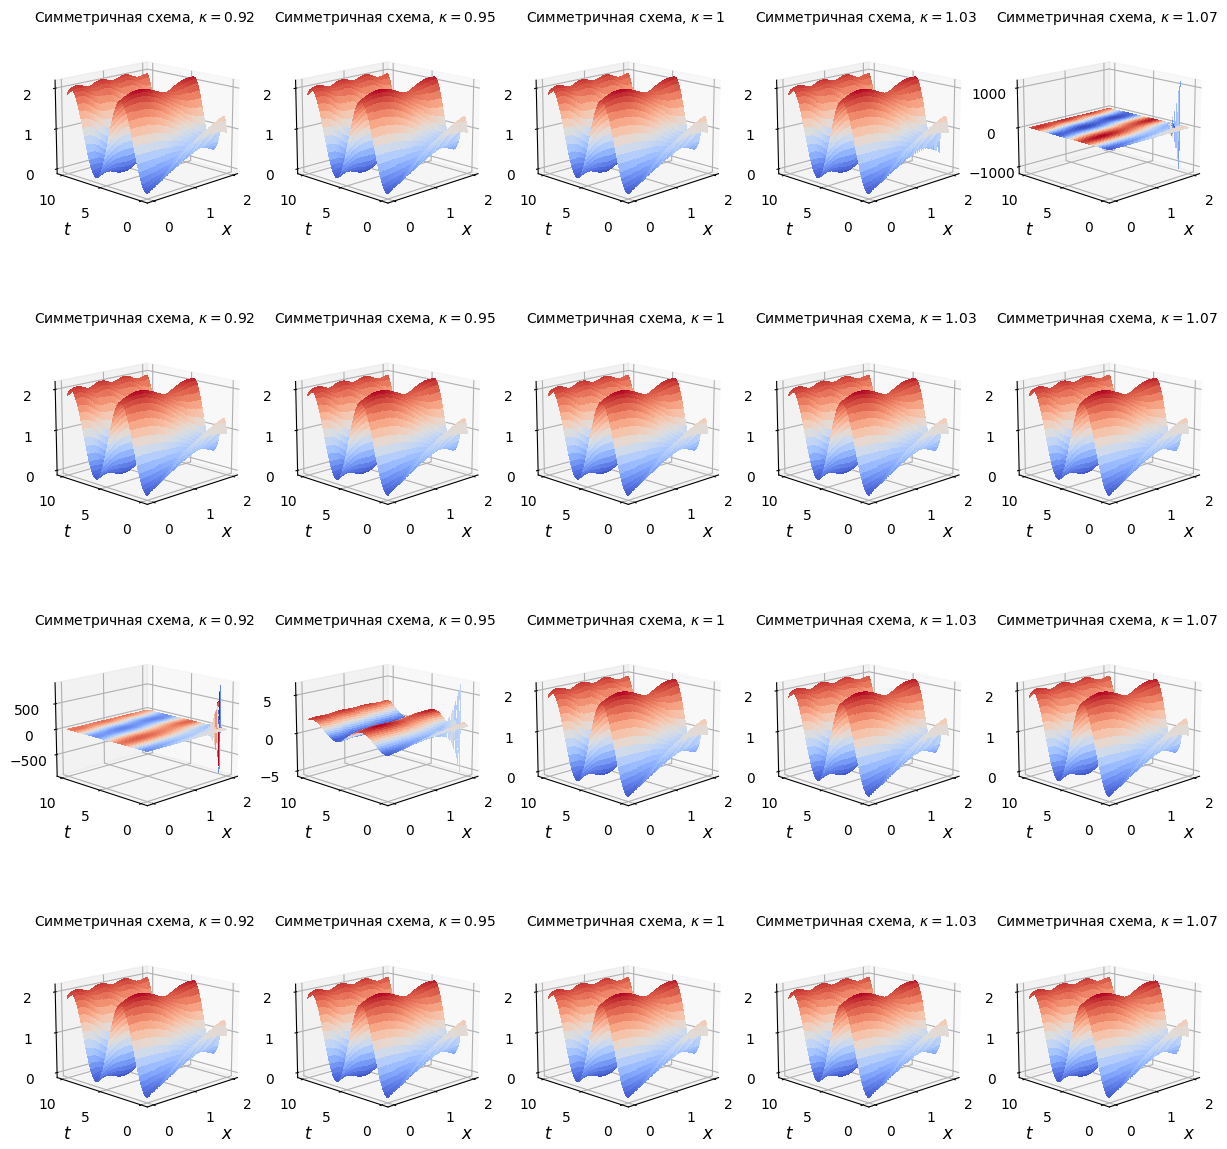

In [32]:
# Выбираем нужные каппы
kappas = (0.92, 0.95, 1, 1.03, 1.07)

schemes = (ExplicitScheme, PureImplicitScheme, ImplicitScheme, SymmetricScheme)
names = ("Явная схема", "Чисто неявная схема", "Неявная схема", "Симметричная схема")
numbers = range(4)

# Создаём графики
fig, axes = plt.subplots(len(schemes), len(kappas), figsize=(15, 15), subplot_kw={"projection": "3d"})

# Границы по x и по t
a = 2
to_time = 10

# Выбираем тау
tau=0.01

# Цикл по всем методам и каппам
for i, names, func in zip(numbers, names, schemes):
    for ax, kappa in zip(axes[i, :], kappas):

        # Рассчитываем нужное h
        h = c * tau / kappa
        # Сетка по x и t
        xs = np.arange(0, a, h)
        ts = np.arange(0, to_time, tau)

        n = xs.shape[0]
        k = ts.shape[0]
        # Сетка значений u
        mesh = np.zeros((n, k))
        # Заполняем значения u при t = 0
        mesh[:, 0] = np.array(list(map(phi, xs)))
        # Заполняем значения u при x = 0
        mesh[0, :] = np.array(list(map(psi, ts)))
        u_values = func(c, f, xs, ts, mesh, tau, h)


        ax.set_xlabel('$x$', fontsize=12)
        ax.set_ylabel('$t$', fontsize=12)
        ax.view_init(elev=15, azim=-135)
        xv, tv = np.meshgrid(xs, ts)
        ax.plot_surface(xv, tv, u_values.T, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)
        ax.set_title(rf"{func_name}, $\kappa={kappa}$", fontsize=10)